In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

In [4]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

**Check Missing Value**

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

****

**Check Duplicates**

In [7]:
df.duplicated().sum()

0

**Check the Data Types**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Check the Number of Unique Values in Each Column**

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

**Check Statistics of the Data Set**
To examine the dataset’s statistics and determine the data’s statistics.

In [10]:
col=df.columns
for i in range(0,len(col)-3):
    print(f"Categories in {col[i]} variable:  ",end=" ")
    print(df[str(col[i])].unique())

Categories in gender variable:   ['female' 'male']
Categories in race/ethnicity variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:   ['standard' 'free/reduced']
Categories in test preparation course variable:   ['none' 'completed']


# **Numerical and categorical columns:**

In [11]:

numeric_columns=[i for i in df.columns if df[i].dtype!="object"]
catgorial_columns=[i for i in df.columns if df[i].dtype=="object"]

print(numeric_columns)
print(catgorial_columns)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
#Adding two columns total score and total average of a student
df["total score"]=df["math score"]+df["reading score"]+df["writing score"]
df["average"]=df["total score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# Visualize Average Score Distribution to Make Some Conclusion
* Histogram
* Kernel Distribution Function (KDE)
* Histogram & KDE

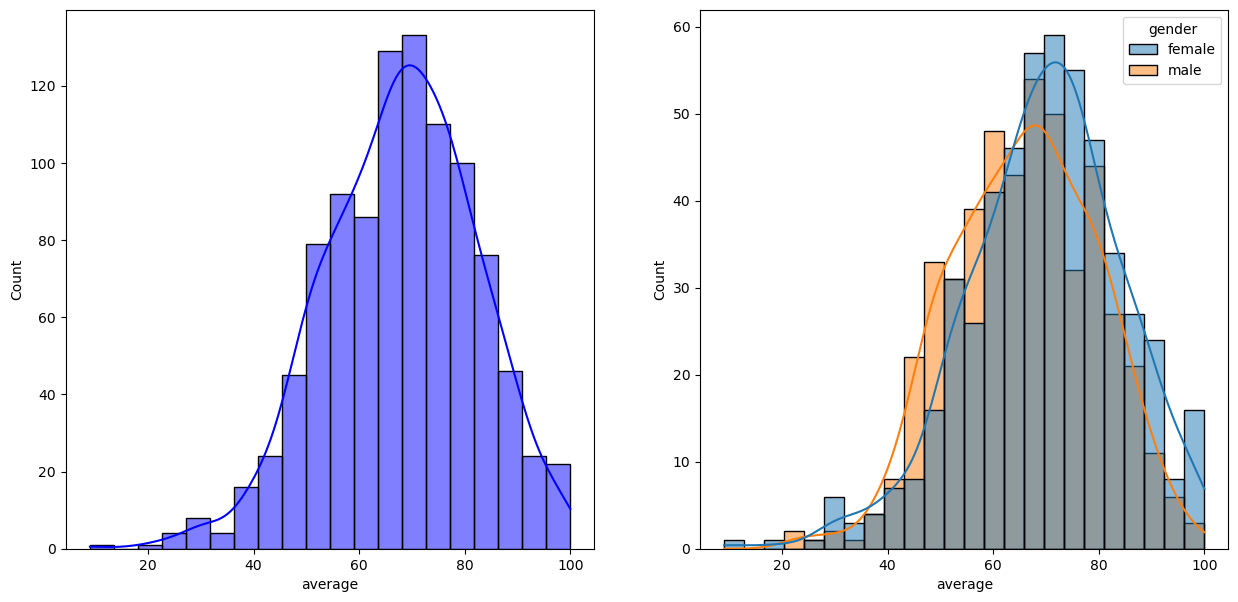

In [13]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x="average",bins=20,kde=True,color="b")

#gender wise hist plot
plt.subplot(122)
sns.histplot(data=df,x="average",hue="gender",kde=True)
plt.show()

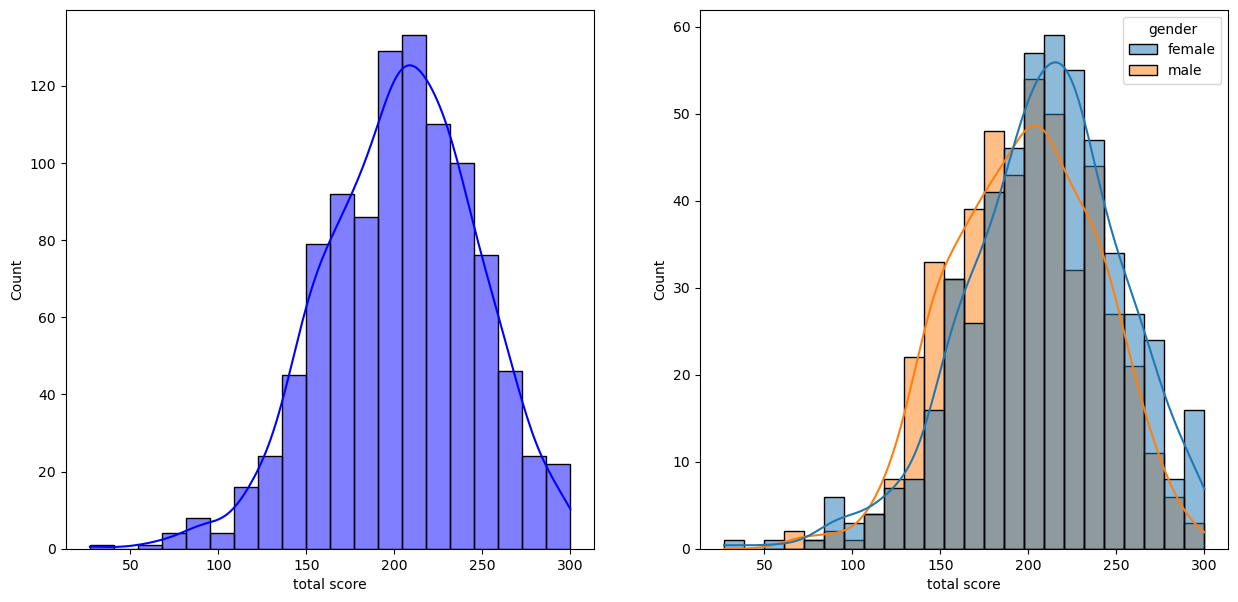

In [14]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x="total score",bins=20,kde=True,color="b")

#gender wise hist plot
plt.subplot(122)
sns.histplot(data=df,x="total score",hue="gender",kde=True)
plt.show()

Text(0.5, 1.0, 'Female students')

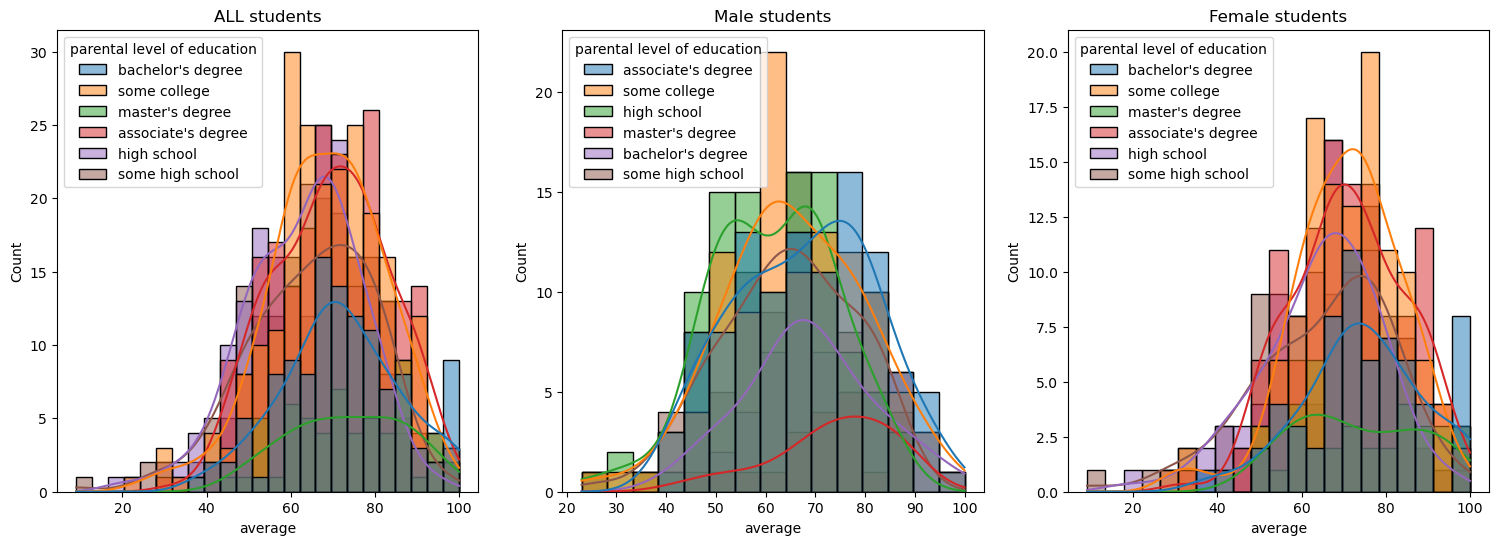

In [15]:
fig,axs=plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
sns.histplot(data=df,x="average",hue="parental level of education",kde=True)
plt.title("ALL students")

plt.subplot(142)
sns.histplot(data=df[df["gender"]=="male"],x="average",hue="parental level of education",kde=True)
plt.title("Male students")


plt.subplot(143)
sns.histplot(data=df[df["gender"]=="female"],x="average",hue="parental level of education",kde=True)
plt.title("Female students")

Text(0.5, 1.0, 'Female students')

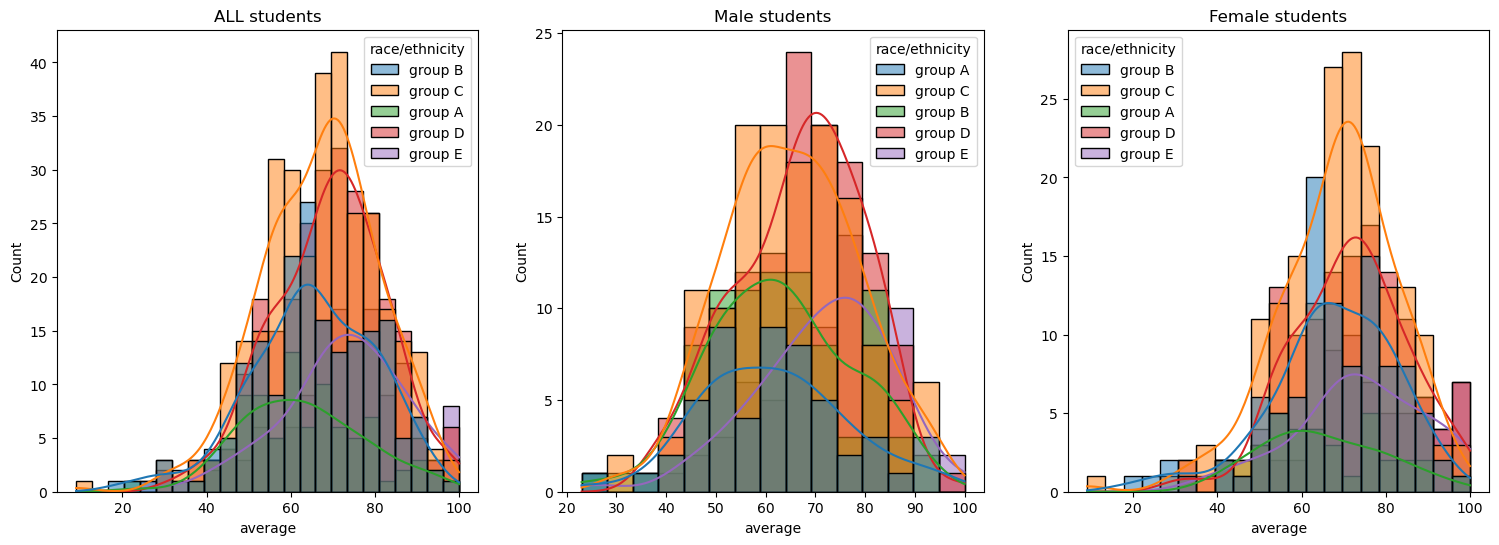

In [16]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="average",hue="race/ethnicity",kde=True)
plt.title("ALL students")

plt.subplot(142)
sns.histplot(data=df[df["gender"]=="male"],x="average",hue="race/ethnicity",kde=True)
plt.title("Male students")


plt.subplot(143)
sns.histplot(data=df[df["gender"]=="female"],x="average",hue="race/ethnicity",kde=True)
plt.title("Female students")

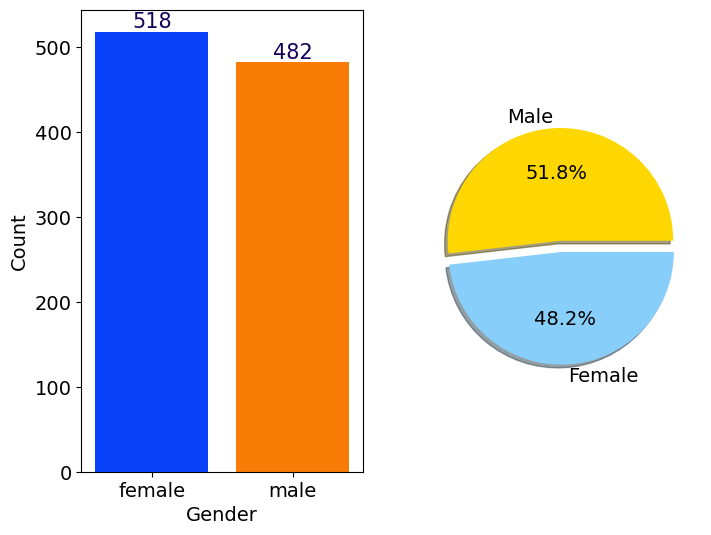

In [17]:
f,ax=plt.subplots(1,2,figsize=(8,6))


# Create a countplot of the 'gender' column and add labels to the bars
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='#13005A',size=15)

# Set font size of x-axis and y-axis labels and tick labels
ax[0].set_xlabel('Gender', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)

# Create a pie chart of the 'gender' column and add labels to the slices
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['gold','lightskyblue'], textprops={'fontsize': 14})

# Display the plot
plt.show()

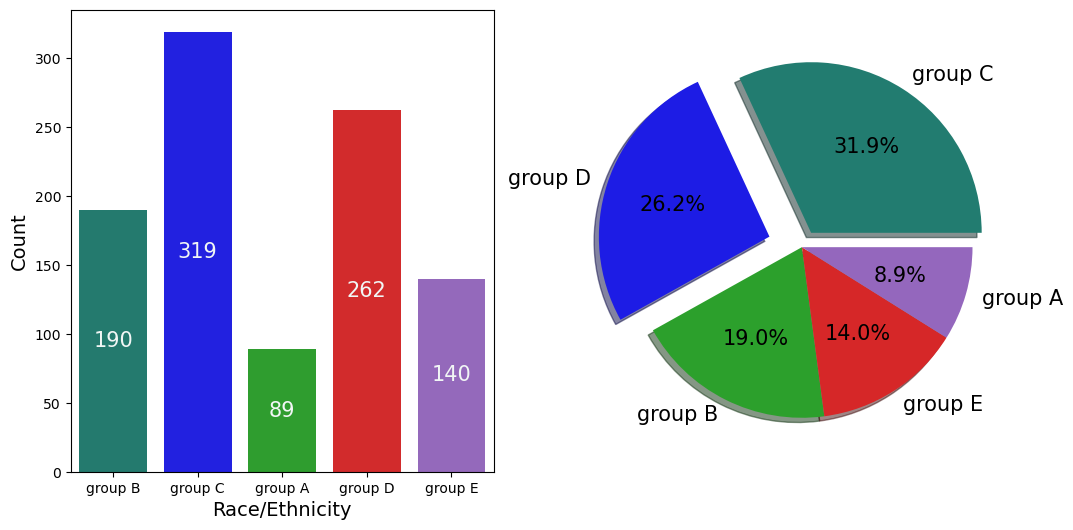

In [18]:
# Create a figure with two subplots
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Define a color palette for the countplot
colors = ['#227C70', '#1D1CE5', '#2ca02c', '#d62728', '#9467bd']
sns.countplot(x=df['race/ethnicity'], data=df, palette=colors, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    
    ax[0].bar_label(container,color='#F1F6F5',size=15,label_type='center')


ax[0].set_xlabel('Race/Ethnicity', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=10)
# Create a pie chart of the 'race/ethnicity' column and add labels to the slices
plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1, 0.2, 0, 0, 0], autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize': 15})

plt.axis('equal')

plt.show()

> Most of the student belonging from group C /group D.
Lowest number of students belong to group A.

In [19]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average'],
      dtype='object')

**Parental Level of Education Column**

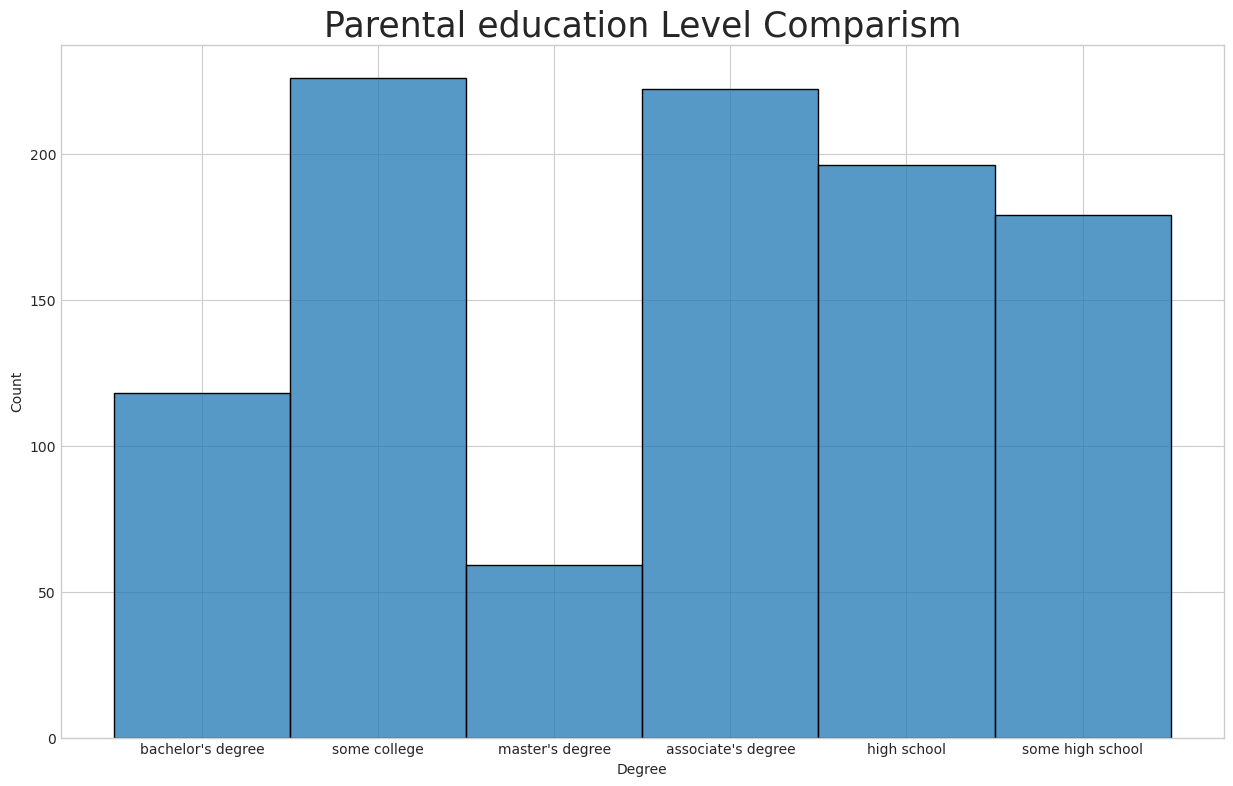

In [20]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-whitegrid')
sns.histplot(df["parental level of education"],palette="Blue")
plt.title("Parental education Level Comparism",fontsize=25)
plt.xlabel("Degree")
plt.ylabel("Count")

plt.show()

> Largest number of parents are from college.

**Bivariate Analysis**

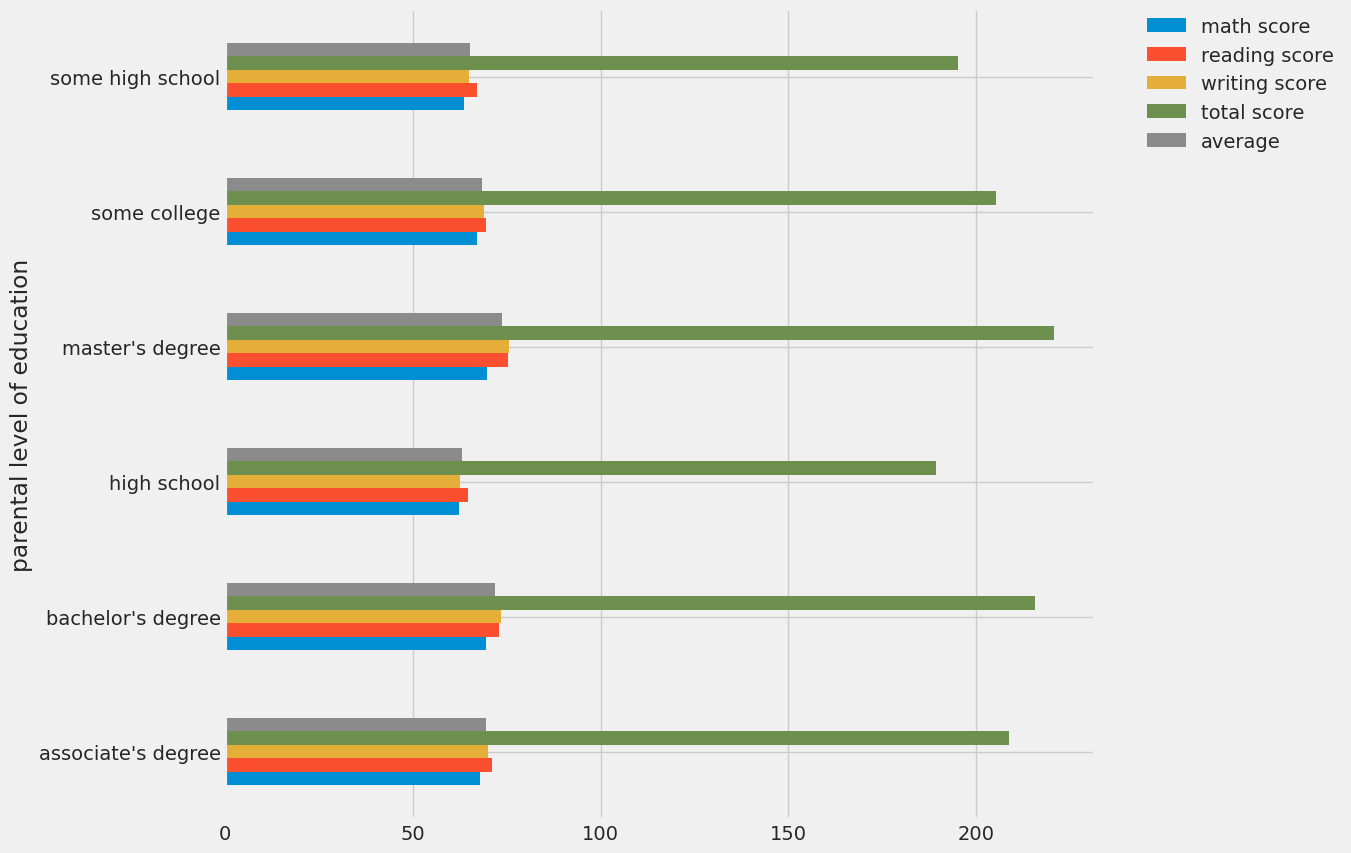

In [21]:
plt.style.use('fivethirtyeight')
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

* > The score of student whose parents possess master and bachelor level education are higher than others.

**Maximum Score of Students in All Three Subjects**

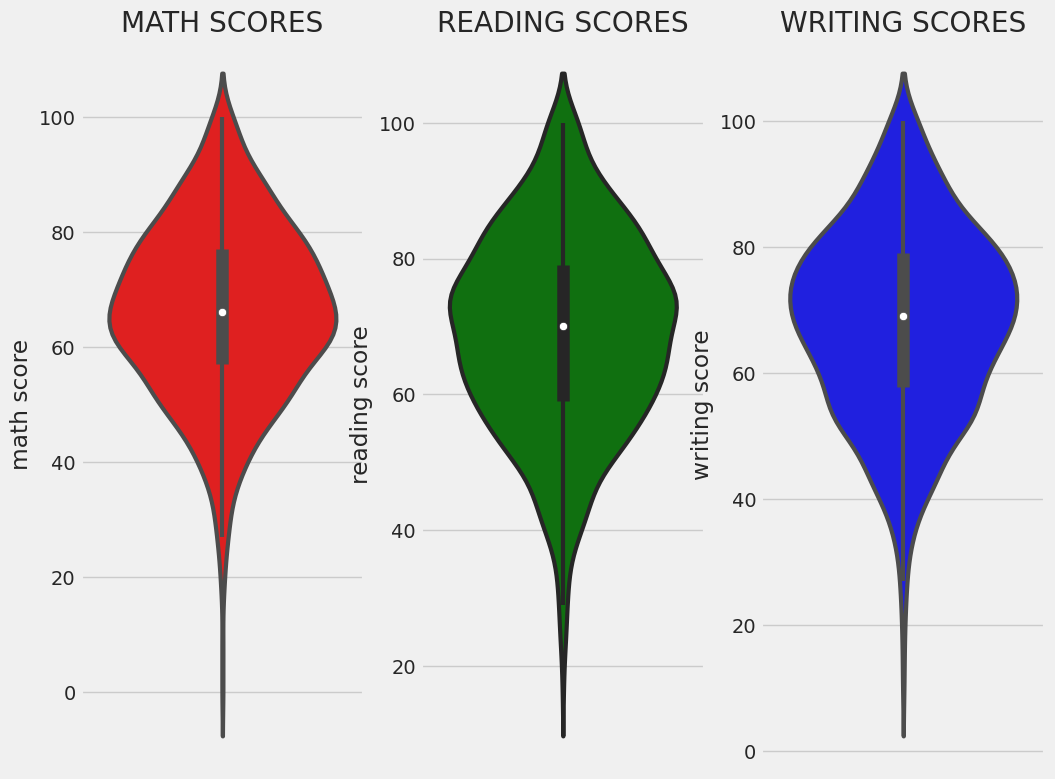

In [22]:
figsize=(18,8)

plt.subplot(1, 4, 1) 
plt.title('MATH SCORES') 
sns.violinplot(y='math score',data=df,color='red',linewidth=3)

plt.subplot(1, 4, 2) 
plt.title('READING SCORES') 
sns.violinplot(y='reading score',data=df,color='g',linewidth=3)


plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

* > From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

**Multivariate Analysis Using Pie Plot**

(-1.25, 1.25, -1.25, 1.25)

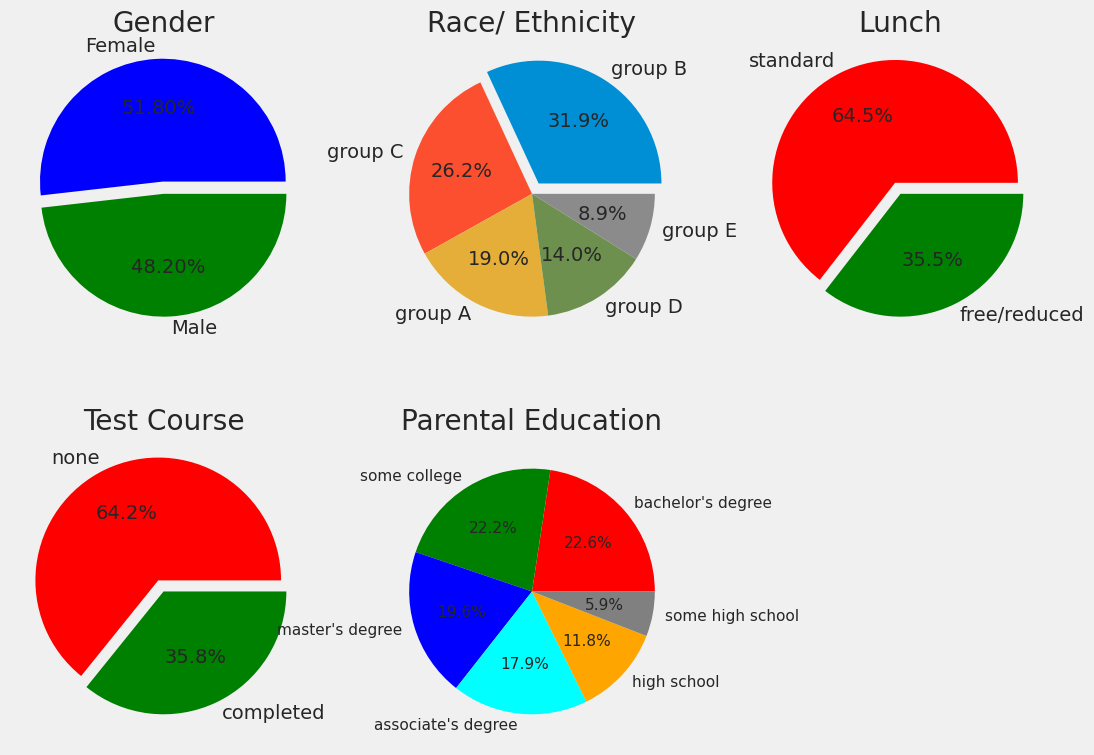

In [23]:
# Set figure size
plt.rcParams['figure.figsize'] = (12, 9)

# First row of pie charts
plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['blue','green']
plt.pie(size, colors=color, labels=labels,explode=(0.1,0), autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(2,3,2)
size=df["race/ethnicity"].value_counts()
labels=df["race/ethnicity"].unique()

plt.pie(size,labels=labels,autopct='%.1f%%',explode=(0.1,0,0,0,0))
plt.title("Race/ Ethnicity")

plt.axis('off')

plt.subplot(2,3,3)
size=df["lunch"].value_counts()
labels=df["lunch"].unique()
color = ['red', 'green']
plt.pie(size,labels=labels,autopct='%.1f%%',explode=(0.1,0),colors=color)
plt.title("Lunch")

plt.axis('off')



plt.subplot(2,3,4)
size=df["test preparation course"].value_counts()
labels=df["test preparation course"].unique()
color = ['red', 'green']
plt.pie(size,labels=labels,autopct='%.1f%%',explode=(0.1,0),colors=color)
plt.title("Test Course")

plt.axis('off')



plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = df["parental level of education"].unique()
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.1f%%', textprops={'fontsize': 11})
plt.title('Parental Education', fontsize=20)
plt.axis("off")

* The number of Male and Female students is almost equal.
* The number of students is higher in Group C.
* The number of students who have standard lunch is greater.
* The number of students who have not enrolled in any test preparation course is greater.
* The number of students whose parental education is “Some College” is greater followed closely by “Associate’s Degree”.

**BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )**

In [24]:
gender_group=df.groupby("gender").mean() 
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


[0 1]


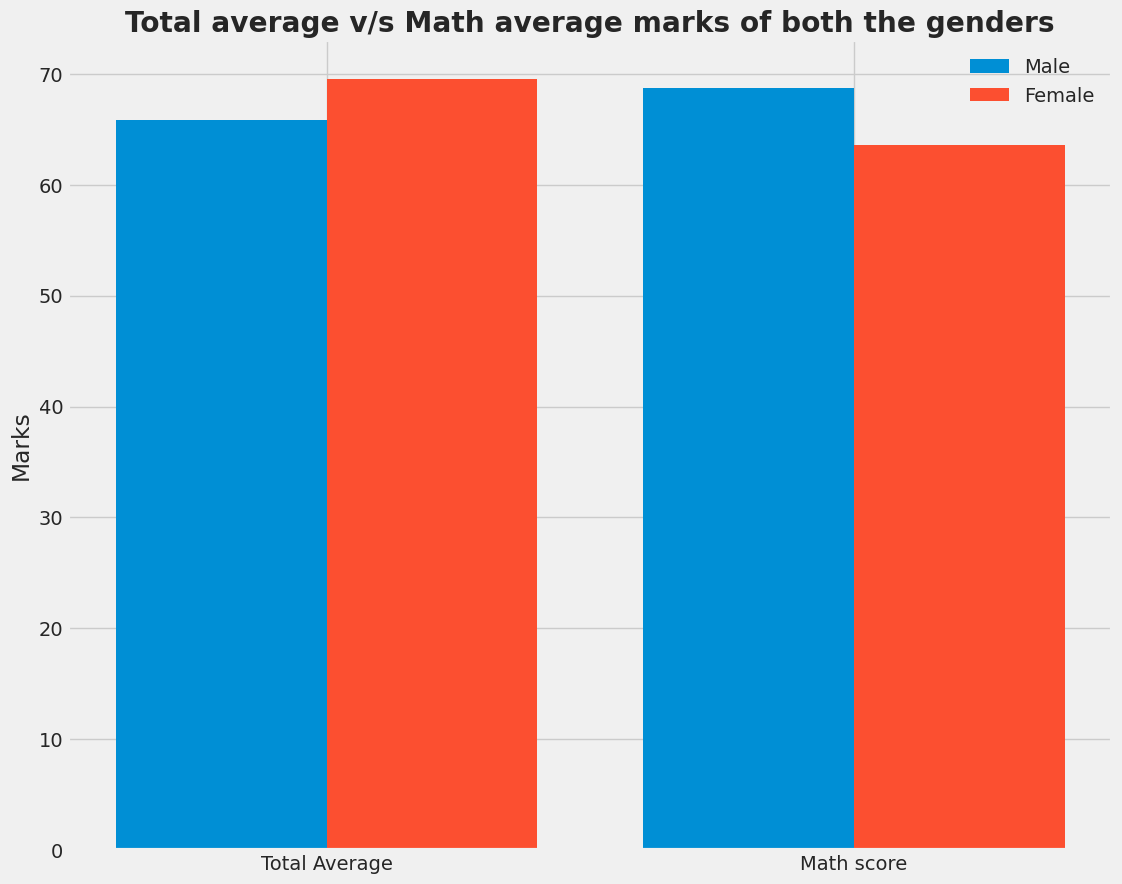

In [25]:
plt.figure(figsize=(12,10))
X=["Total Average","Math score"]
female_scores=[gender_group["average"][0],gender_group["math score"][0]]
male_scores=[gender_group["average"][1],gender_group["math score"][1]]

X_axis = np.arange(len(X))
print(X_axis)
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

**BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )**

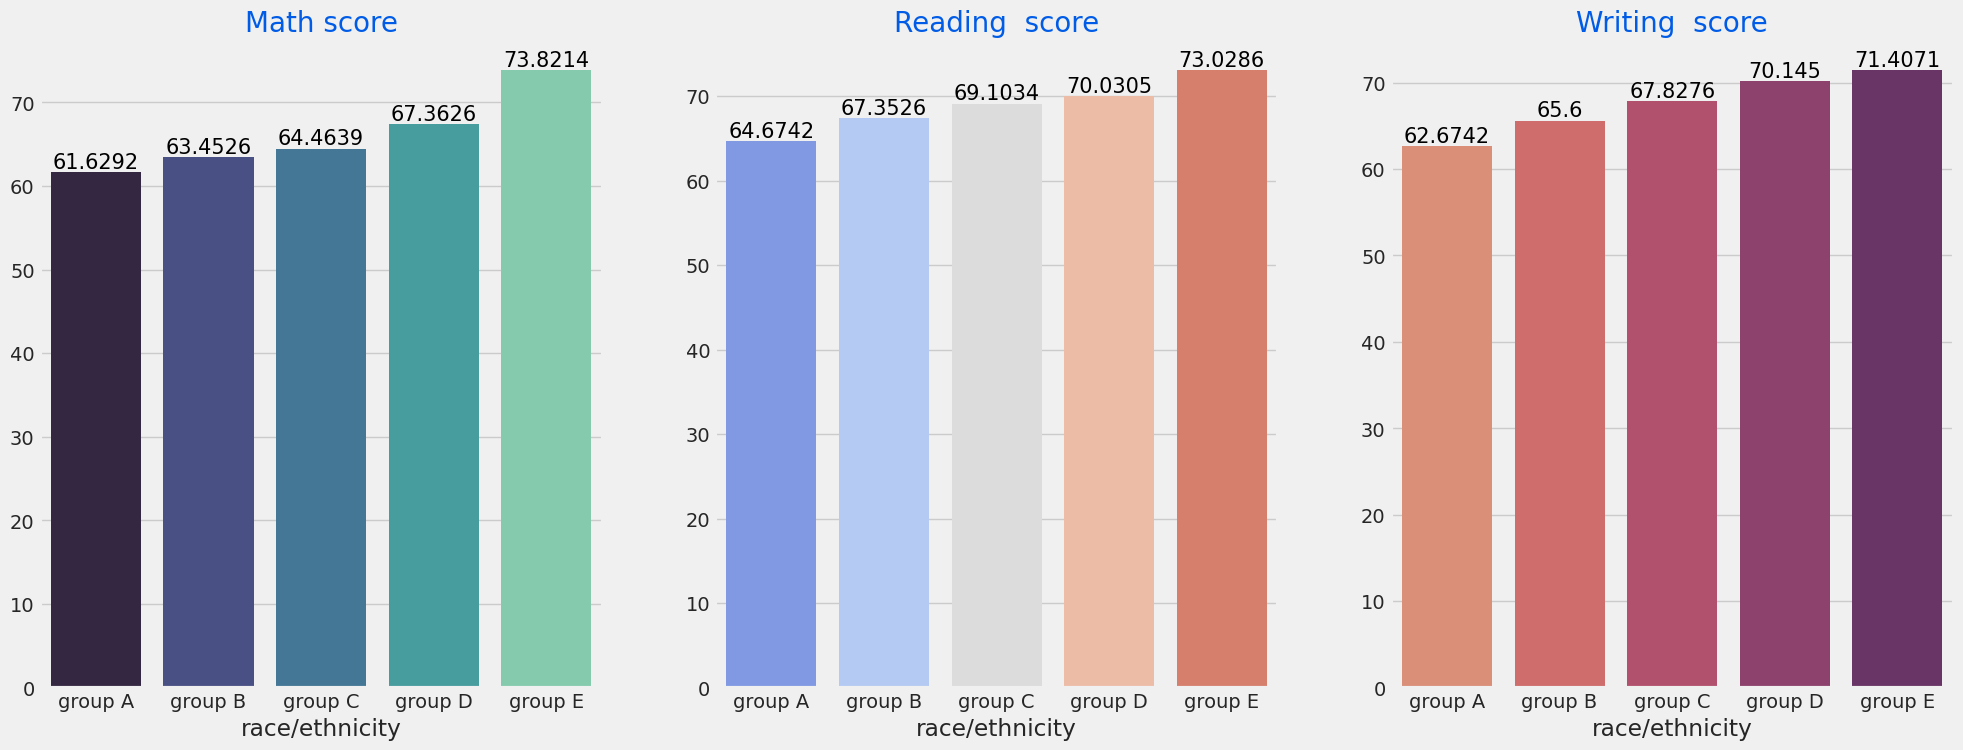

In [26]:
race_group=df.groupby("race/ethnicity")

f,ax=plt.subplots(1,3,figsize=(22,8))


sns.barplot(x=race_group["math score"].mean().index,y=race_group["math score"].mean().values,ax=ax[0],palette = 'mako')
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=15)
    
    
sns.barplot(x=race_group["reading score"].mean().index,y=race_group["reading score"].mean().values,ax=ax[1],palette = 'coolwarm')
ax[1].set_title('Reading  score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color="black",size=15)
    
    
    
sns.barplot(x=race_group["writing score"].mean().index,y=race_group["writing score"].mean().values,ax=ax[2],palette = 'flare')
ax[2].set_title('Writing  score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color="black",size=15)

> Group E students have scored the highest marks.
> Group A students have scored the lowest marks.
> Students from a lower Socioeconomic status have a lower avg in all course subjects

**CHECKING OUTLIERS**

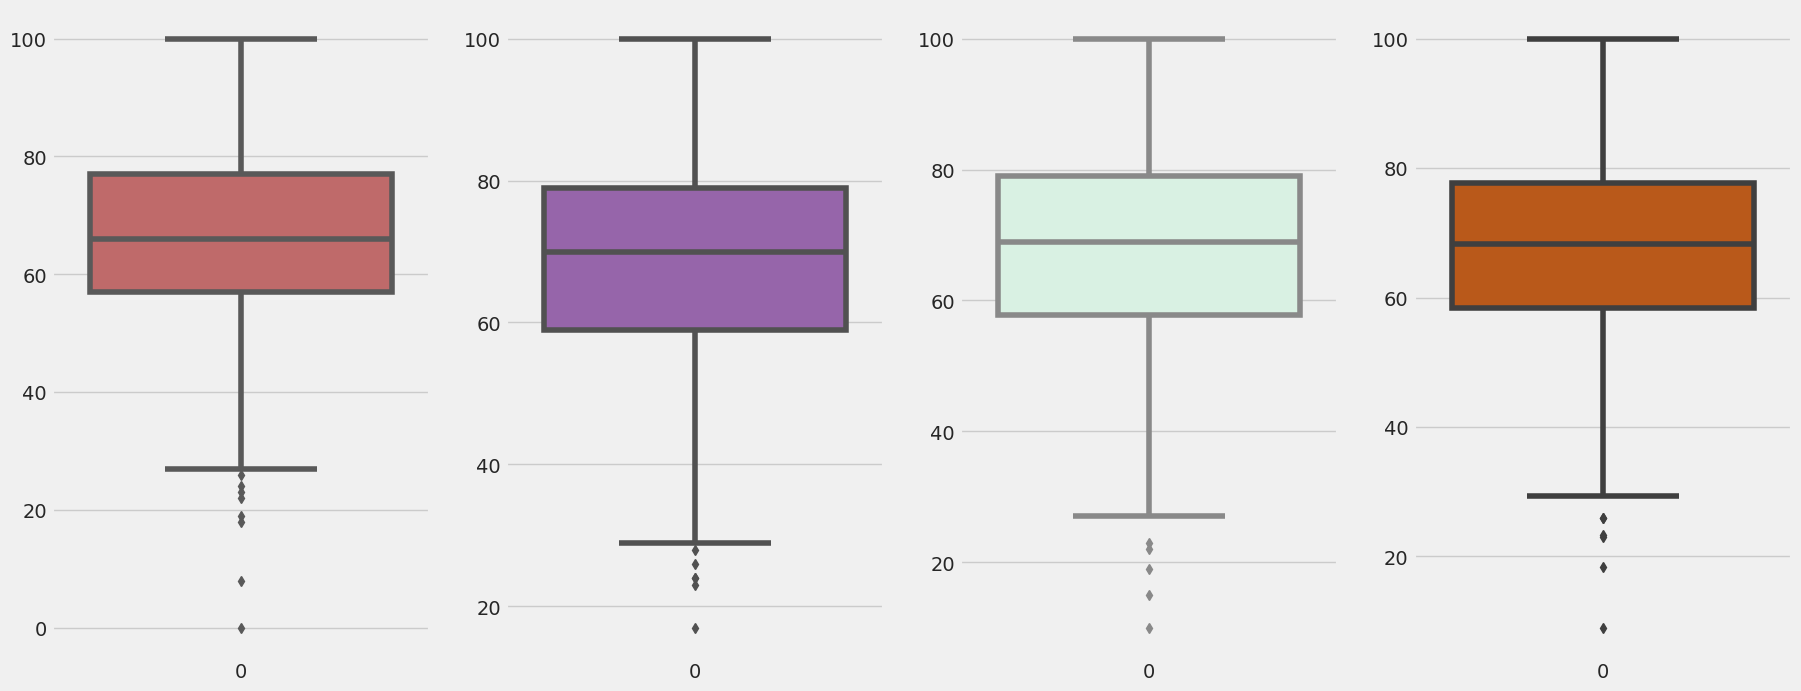

In [27]:
plt.subplots(1,4,figsize=(20,8))

plt.subplot(141)
sns.boxplot(df["math score"],color="#CD5C5C")

plt.subplot(142)
sns.boxplot(df["reading score"],color="#9B59B6")


plt.subplot(143)
sns.boxplot(df["writing score"],color="#D5F5E3")


plt.subplot(144)
sns.boxplot(df["average"],color="#D35400")

plt.show()

**MUTIVARIATE ANALYSIS USING PAIRPLOT**

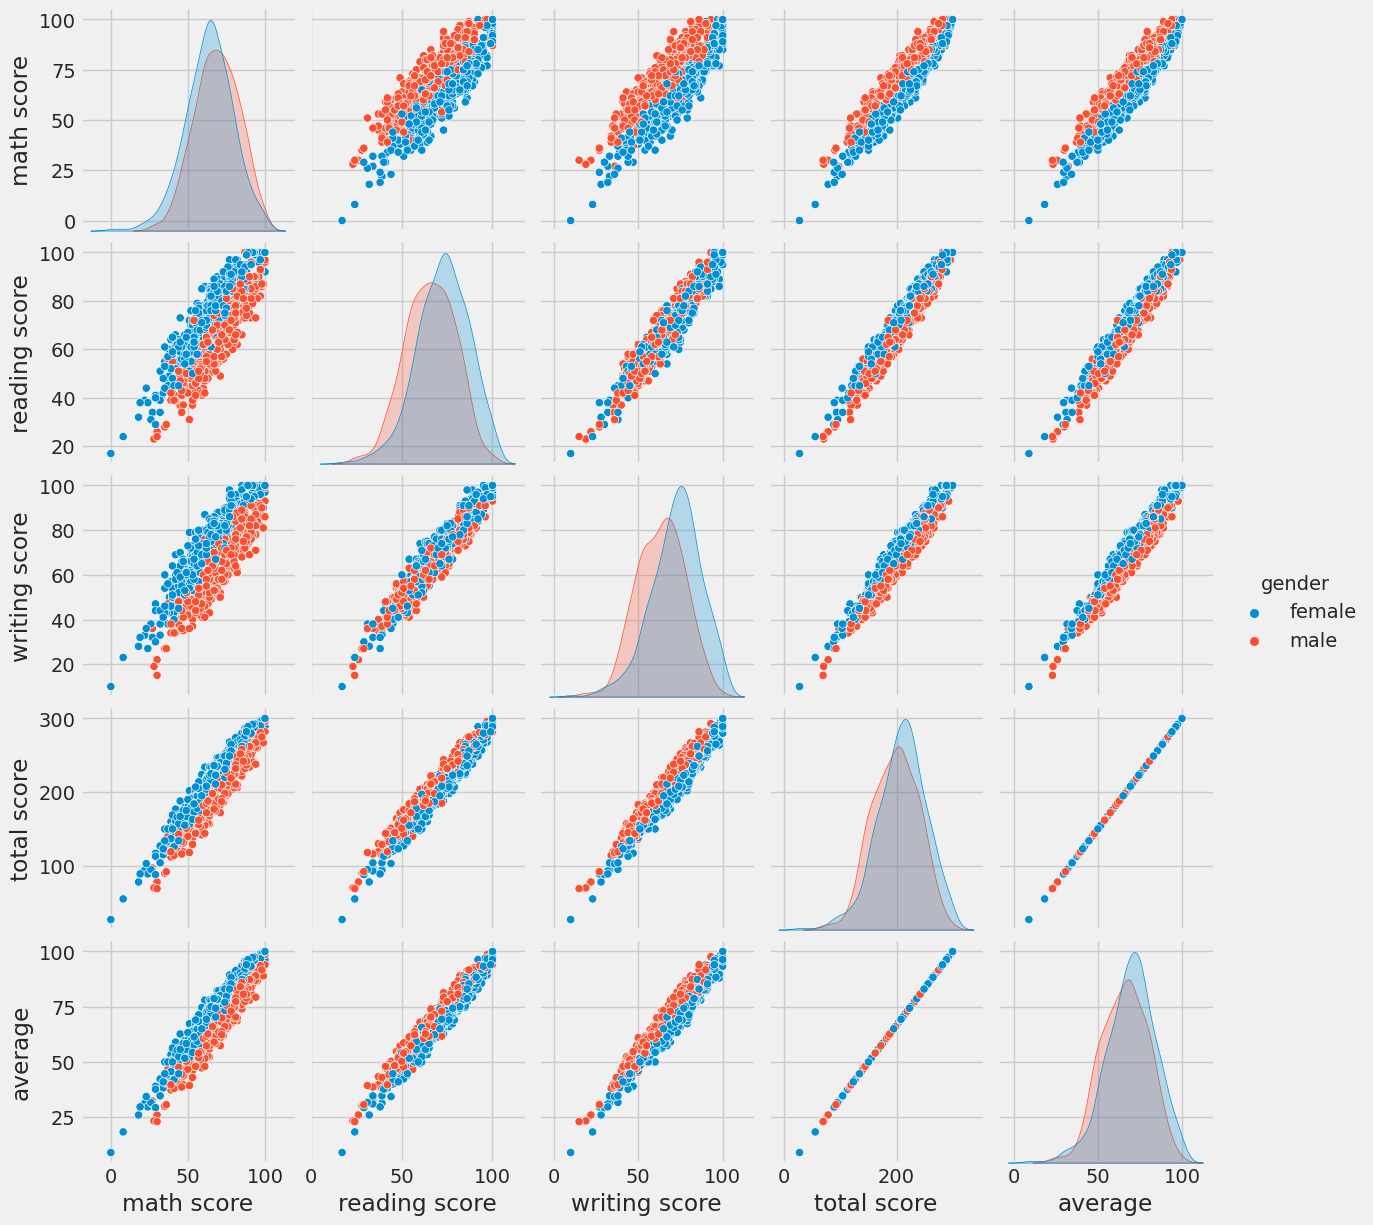

In [28]:
sns.pairplot(df,hue="gender")
plt.show()